In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib  # For saving the trained model

In [2]:
# **Step 1: Load the dataset**
csv_file = "data/thermal-porosity-table.csv"  
df = pd.read_csv(csv_file)

# **Step 2: Separate features (X) and labels (y)**
X = df.drop(columns=["Porosity Label"])  # Drop label column to get features
y = df["Porosity Label"]  # Target variable

# **Step 3: Split data into training (80%) and testing (20%)**
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **Step 4: Apply SMOTE for class balancing**
smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Balance minority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# **Step 5: Train Random Forest Classifier**
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=5,  # Limit tree depth to avoid overfitting
    min_samples_split=5,  # Minimum samples required to split a node
    min_samples_leaf=2,  # Minimum samples required at a leaf node
    bootstrap=True,  # Bootstrap sampling to increase diversity
    random_state=42
)

# Train the model on the resampled data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# **Step 6: Make predictions**
y_pred = rf_classifier.predict(X_test)

# **Step 7: Evaluate model performance**
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation results
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# **Step 8: Save the trained model**
joblib.dump(rf_classifier, "random_forest_anomaly_model.pkl")
print("Random Forest model saved as 'random_forest_anomaly_model.pkl'")



Random Forest Model Evaluation:
Accuracy: 1.00
Confusion Matrix:
[[299   0]
 [  0  14]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       1.00      1.00      1.00        14

    accuracy                           1.00       313
   macro avg       1.00      1.00      1.00       313
weighted avg       1.00      1.00      1.00       313

Random Forest model saved as 'random_forest_anomaly_model.pkl'


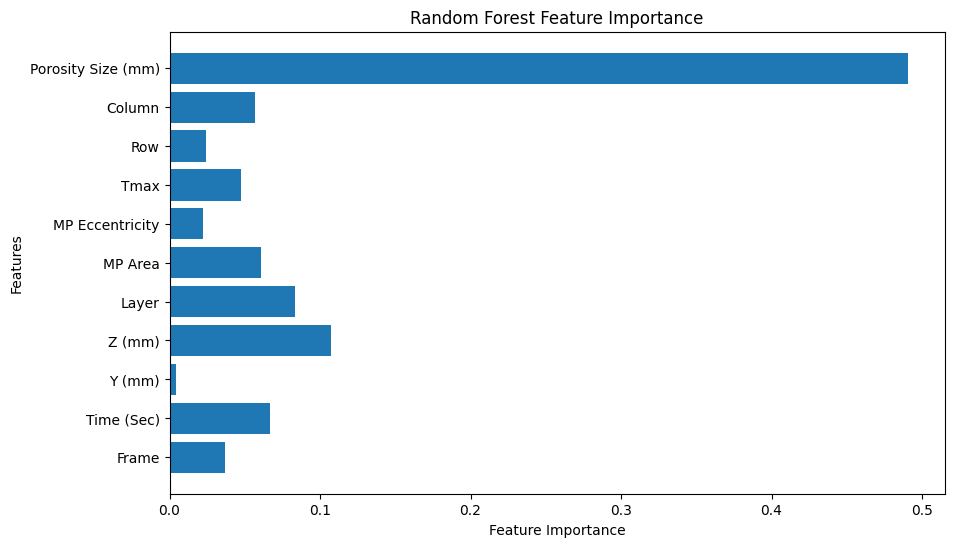

In [3]:
import matplotlib.pyplot as plt
feature_importance = rf_classifier.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()
